In [2]:
#importing neccessary library
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.figure_factory as ff 

In [3]:
#importing the dataset
data = pd.read_csv('data\heart_failure_clinical_records_dataset.csv')

In [7]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:>

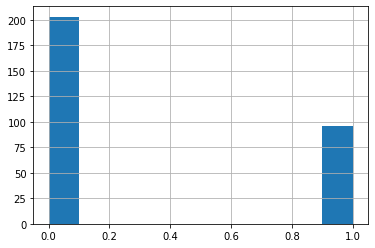

In [10]:
# checking the death rate in the death event
data['DEATH_EVENT'].hist()

In [14]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
# splitting dataset independent variable and target variable
x = pd.get_dummies(data.drop(['ejection_fraction','time','DEATH_EVENT'],axis=1))
y = data['DEATH_EVENT']

In [36]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,0,327000.00,2.7,116,0,0


In [38]:
y.tail()

294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, dtype: int64

In [6]:
#splitting the the x and y variable to test and train variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size = 0.2,random_state=0)

In [44]:
x_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
206,40.000,1,101,0,0,226000.0,0.8,141,0,0
188,60.667,1,151,1,1,201000.0,1.0,136,0,0
12,45.000,1,981,0,0,136000.0,1.1,137,1,0
219,55.000,0,582,1,1,371000.0,0.7,140,0,0
237,70.000,0,232,0,0,173000.0,1.2,132,1,0


In [46]:
y_test.head()

206    0
188    0
12     1
219    0
237    0
Name: DEATH_EVENT, dtype: int64

### modelling using Logistic Regression
* Predicts the output of a categorical dependent variable
* it gives a probability value which is between 0 and 1
* it is typically for a classification problem like the heart failure clinical record

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [6]:
logreg=LogisticRegression()
logreg.fit(x,y)

LogisticRegression()

In [10]:
logreg.score(x_test,y_test)

0.6666666666666666

### Improving model score for LR using grid search CV

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
grid_search={'C':np.logspace(-4,4,20),'solver':['liblinear']}
grid_search_log = GridSearchCV(LogisticRegression(),param_grid=grid_search,cv=5,verbose=True)
grid_search_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [13]:
grid_search_log.best_params_

{'C': 0.00026366508987303583, 'solver': 'liblinear'}

In [14]:
grid_search_log.score(x_test,y_test)

0.6

### Model Prediction with RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [16]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
clf.score(x_test,y_test)

0.75

### Improving model score for random forest classifier
* It takes less training time as compared to other algorithms.
* It predicts output with high accuracy, even for the large dataset it runs efficiently.
* It can also maintain accuracy when a large proportion of data is missing.

In [18]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]}

In [19]:
cv = GridSearchCV(clf,parameters,cv=5)
cv.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [20]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [21]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 250}


0.707 + or -0.035 for the {'max_depth': 2, 'n_estimators': 5}
0.737 + or -0.03 for the {'max_depth': 2, 'n_estimators': 10}
0.749 + or -0.022 for the {'max_depth': 2, 'n_estimators': 50}
0.732 + or -0.032 for the {'max_depth': 2, 'n_estimators': 100}
0.749 + or -0.026 for the {'max_depth': 2, 'n_estimators': 250}
0.728 + or -0.047 for the {'max_depth': 4, 'n_estimators': 5}
0.737 + or -0.044 for the {'max_depth': 4, 'n_estimators': 10}
0.753 + or -0.027 for the {'max_depth': 4, 'n_estimators': 50}
0.736 + or -0.016 for the {'max_depth': 4, 'n_estimators': 100}
0.753 + or -0.023 for the {'max_depth': 4, 'n_estimators': 250}
0.678 + or -0.034 for the {'max_depth': 8, 'n_estimators': 5}
0.703 + or -0.068 for the {'max_depth': 8, 'n_estimators': 10}
0.737 + or -0.044 for the {'max_depth': 8, 'n_estimators': 50}
0.732 + or -0.025 for the {'max_depth': 8, 'n_estimators': 100}
0.77 + or -0.018 for the {'max_depth': 8, 'n_estimato

* After improving model score, clf was able to give a better score of 0.77

### Model prediction using k-nearest neighbour Alogrithm
* This model is used in both classification and regression and gives high accuracy score

In [22]:
from sklearn.neighbors import KNeighborsClassifier 

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
knn.score(x_test,y_test)

c:\users\faith\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6166666666666667

### so far RandomForestClassifier gave the best model score of 0.77 